In [51]:
from sklearn import datasets, linear_model, model_selection, metrics
data = datasets.load_diabetes()


In [52]:
import pandas as pd
import numpy as np
diabetes = data.data
print(type(diabetes))
feature_names = data.feature_names

dfDia = pd.DataFrame(diabetes, columns=feature_names)
dfDia.head()

<class 'numpy.ndarray'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [53]:
cor = dfDia.corr()
cor

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


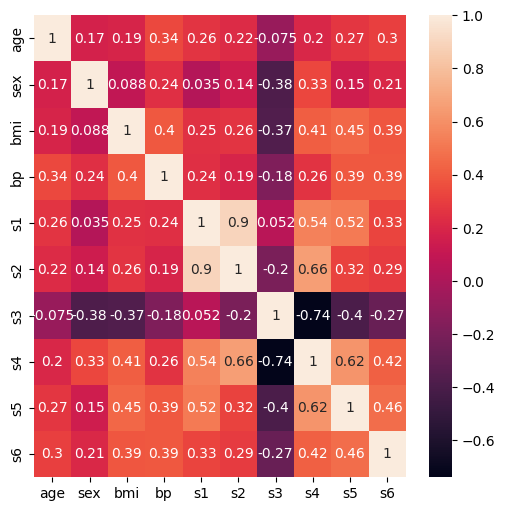

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1,(6,6))
sns.heatmap(cor, annot=True)
plt.show()

<Figure size 640x480 with 0 Axes>

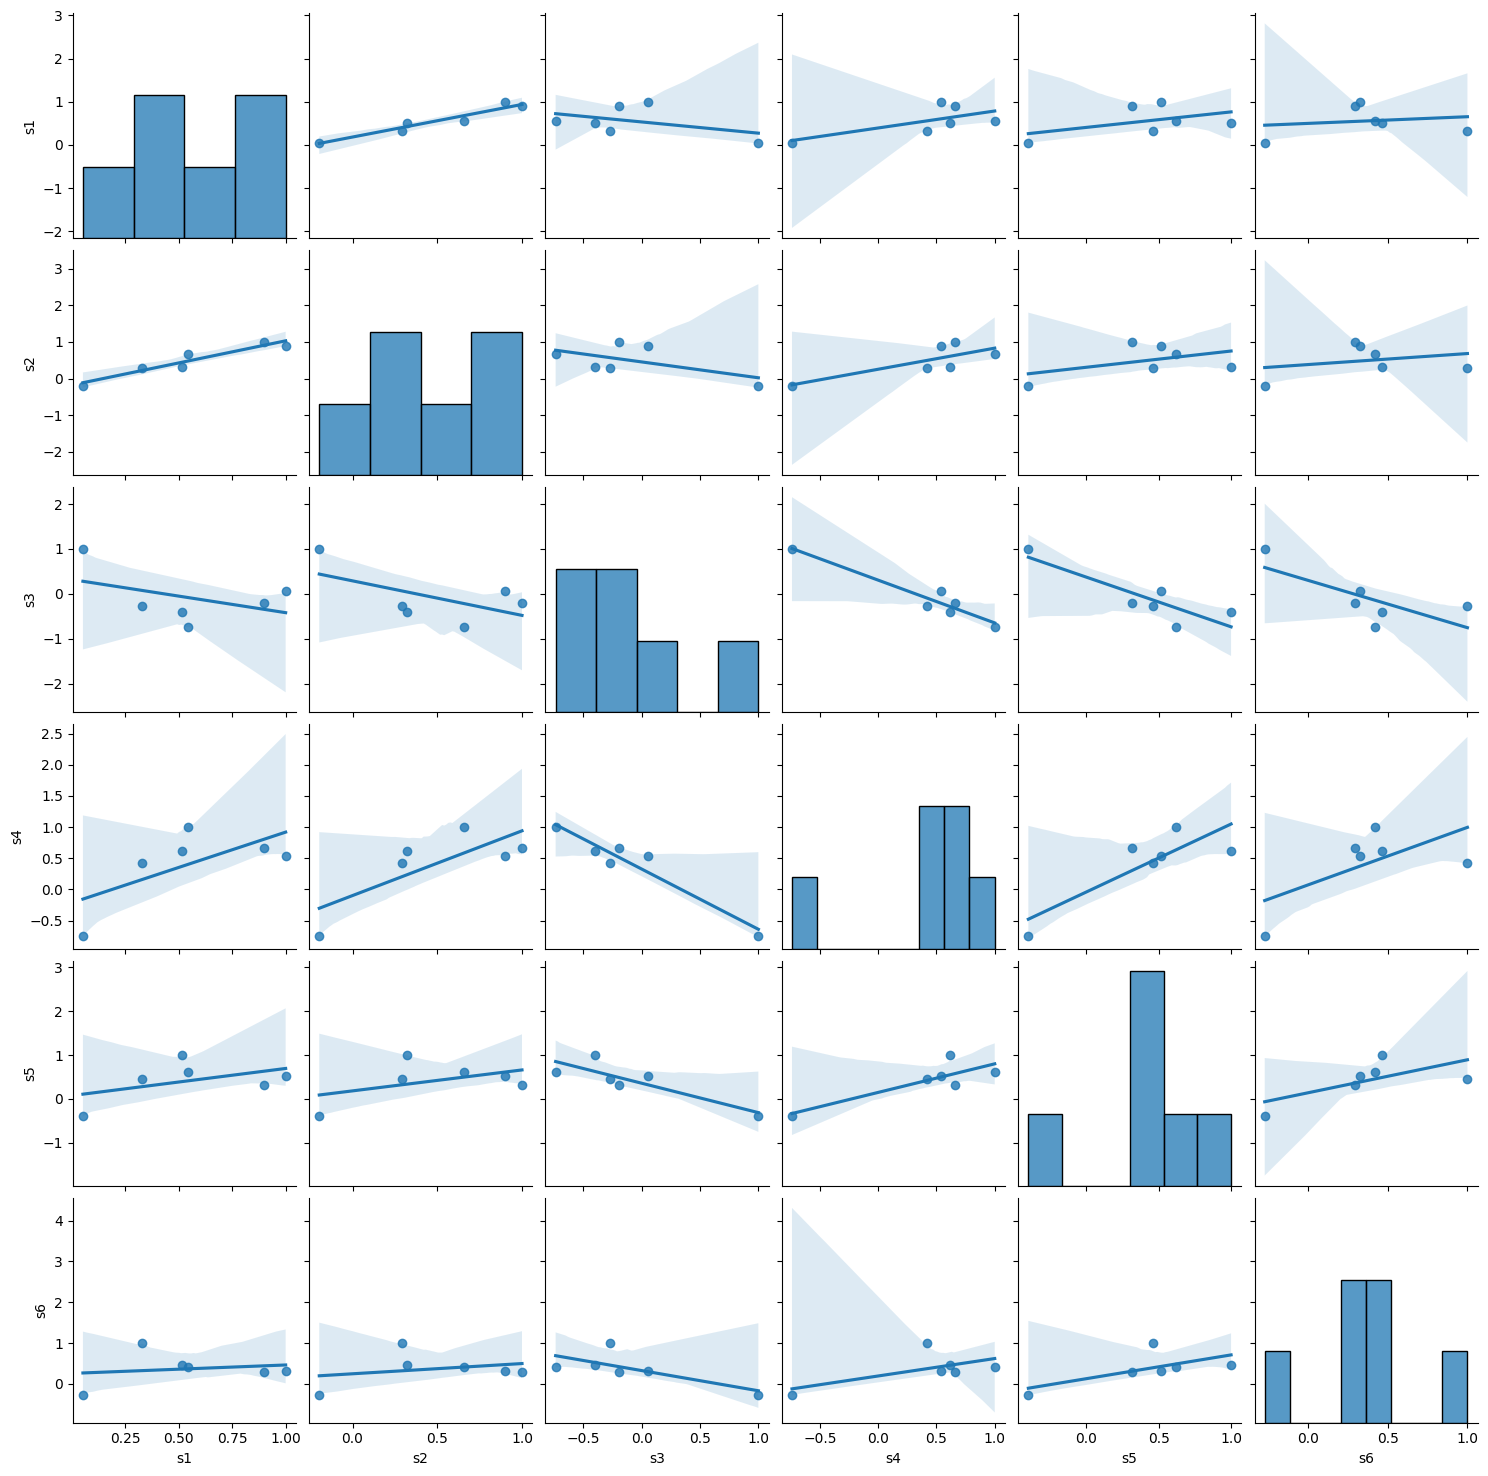

In [55]:
newData = dfDia.drop(['age','sex','bmi', 'bp'], axis=1, inplace=False)
newCorr = newData.corr()
plt.figure(1)
sns.pairplot(newCorr,kind='reg')
plt.show()

In [56]:
#create a linear model where BMI is the dependent variable(y) and s5 is the Independent varianle(x)

x = dfDia['s5'].values
y = dfDia['bmi'].values

x = x.reshape(-1,1)

#if single independent variable is considered
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(309, 1) (309,)
(133, 1) (133,)


In [57]:
lnModel = linear_model.LinearRegression()
lnModel.fit(xtrain,ytrain)

ypredTrn = lnModel.predict(xtrain)
# predict the xtest data
ypredTst = lnModel.predict(xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.188731384763977
Testing r2 value: 0.2093640585468225


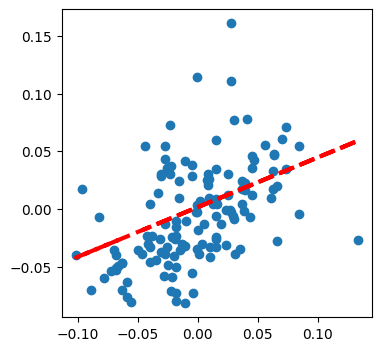

In [58]:
plt.figure(1,(4,4))
plt.scatter(xtest,ytest)
plt.plot(xtest,ypredTst,'--r',linewidth=3)

In [59]:
newData = datasets.fetch_california_housing()
print('featureName: ',newData.feature_names)
print('TargetName: ',newData.target_names)

featureName:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
TargetName:  ['MedHouseVal']


In [60]:
import pandas as pd
import numpy as np
housing = newData.data
feature_names = newData.feature_names
target = newData.target

dfDia = pd.DataFrame(housing, columns=feature_names)
dfDia['target'] = target
dfDia.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
cor = dfDia.corr()
cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

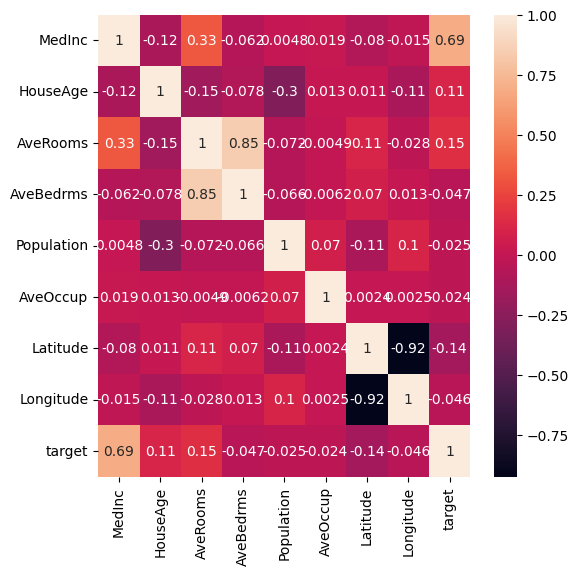

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1,(6,6))
sns.heatmap(cor,annot=True)

In [80]:
X = dfDia[['MedInc','HouseAge','AveRooms','AveOccup']].values # independent variable
y = dfDia['target'].values # dependent variable

# if single independent variable is considered
# split the data into train and test
ratio= 0.3
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(14448, 4) (14448,)
(6192, 4) (6192,)


In [81]:
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.5073188450785393
Testing r2 value: 0.5276141150121123
